# Exploring Relevant Data

In this project lab, we will develop skills for learning more about a social problem by exploring relevant data.  

In [1]:
#To begin, run this cell by pressing the play button. You will need to run this cell twice.
#This code makes sure that your colab has the most recent version of packages that we will use, and loads these packages.

# !pip install --upgrade pip
# !pip install --upgrade Pillow
# !pip install -U pandas-profiling

#Packages for profiling
from pathlib import Path
import pandas as pd
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file

#Packages for working in Google Colab
from google.colab import drive
drive.mount('/content/drive')
FOLDERNAME = "Stanford Summer Session/DATASCI 154/In-class"

#Packages for working with data
import numpy as np
# !pip install "modin[dask]"
import pandas as pd

#Packages for graphing
import matplotlib.pyplot as mplt
import seaborn as sb

import re

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step 1: Load your dataset

In [2]:
df = pd.read_csv(f"drive/My Drive/{FOLDERNAME}/covid19_reddit_comments.csv", nrows=300000)

In [3]:
# from nltk.corpus import words
# nltk.download('words')
# # Assuming 'column_name' is the name of the column containing text in your DataFrame

# # Get the set of English dictionary words
# english_words = set(words.words())

# # Function to remove dictionary words from a text
# def remove_dictionary_words(text):
#     # Split the text into individual words
#     words_list = text.split()

#     # Filter out words that are not in the English dictionary
#     filtered_words = [word for word in words_list if word.lower() not in english_words]

#     # Join the filtered words back into a single text
#     filtered_text = ' '.join(filtered_words)

#     return filtered_text

# # Apply the function to the column
# df['word'] = df['word'].astype("str").apply(remove_dictionary_words)

In [4]:
# #Print out the first few rows of your dataset
# # !pip install nltk
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# stopwords_df = pd.DataFrame({'word': stopwords.words('english')})

# def unnest_tokens(df):
#   df = df.assign(
#       word=df["text"]
#         .str.lower()
#         .str.split(r'[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~\s\t]+')).explode("word").query("`word` != ''")
#   merged_df = pd.merge(df, stopwords_df, left_on=['word'], right_on=['word'],
#     how="left", indicator=True)
#   left_from_merged_df = merged_df.loc[merged_df['_merge'] == 'left_only', 'word']
#   return df[df['word'].isin(left_from_merged_df)].loc[:,["word"]]

# df = unnest_tokens(df)

*Reflection Questions*

What does a row in your dataset represent? (examples: a single bike ride, a county, a person, a point in time) Do you think that you would need data at a different resolution (more or less fine grained) to do your analysis?

YOUR ANSWER HERE

# Step 2: Create a Profiling Report

Note that if your dataset is very large, this step may take awhile. For this lab, you could consider segmenting your dataset and profiling this sample. Your segment could be a random sample, or coorespond to a population of particular interest, for example a particular geographic area, age group, or time period.  

In [5]:
#Drop the time variables because they make the profiler very slow
# df = df.drop(columns=['Start Time', 'Stop Time'])

In [6]:
# Generate the Profiling Report
profile = ProfileReport(
    df, title="Covid Phase 1 Tweets", html={"style": {"full_width": True}}, sort=None
)

In [7]:
# The HTML report in an iframe
profile

Output hidden; open in https://colab.research.google.com to view.

*Reflection Questions*

Which variables are most informative about your social problem?

YOUR ANSWER HERE

What values can this variable take? What is the distribution of this variable?

YOUR ANSWER HERE

Are there any interesting associations between variables in your dataset?

YOUR ANSWER HERE

If you were to use this dataset, do you think that you would need to clean any of the variables? Is there missing data?

YOUR ANSWER HERE

What else did you notice when looking at this profiling report?

YOUR ANSWER HERE

In [8]:
df.value_counts().tail(154900)

type     id       subreddit.id  subreddit.name    subreddit.nsfw  created_utc  permalink                                                                                                    body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

# Step 3: Additional Figures

You may wish to produce additional figures to further explore your data. Here is code that you can modify to make additional types of plots. You do not need to make all of the graphs, just those that you think would be helpful to your understanding of your data and the social problem.

*What is the distribution of the numerical variables?*

In [9]:
#First list all the types of our data from our dataset
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64'), dtype('bool')]

In [10]:
#Here, only consider numerical variables
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,created_utc,sentiment,score
0,1635206399,0.0000,2
1,1635206397,0.1887,32
2,1635206397,0.6720,1
3,1635206397,0.9562,1
4,1635206395,0.0000,-2


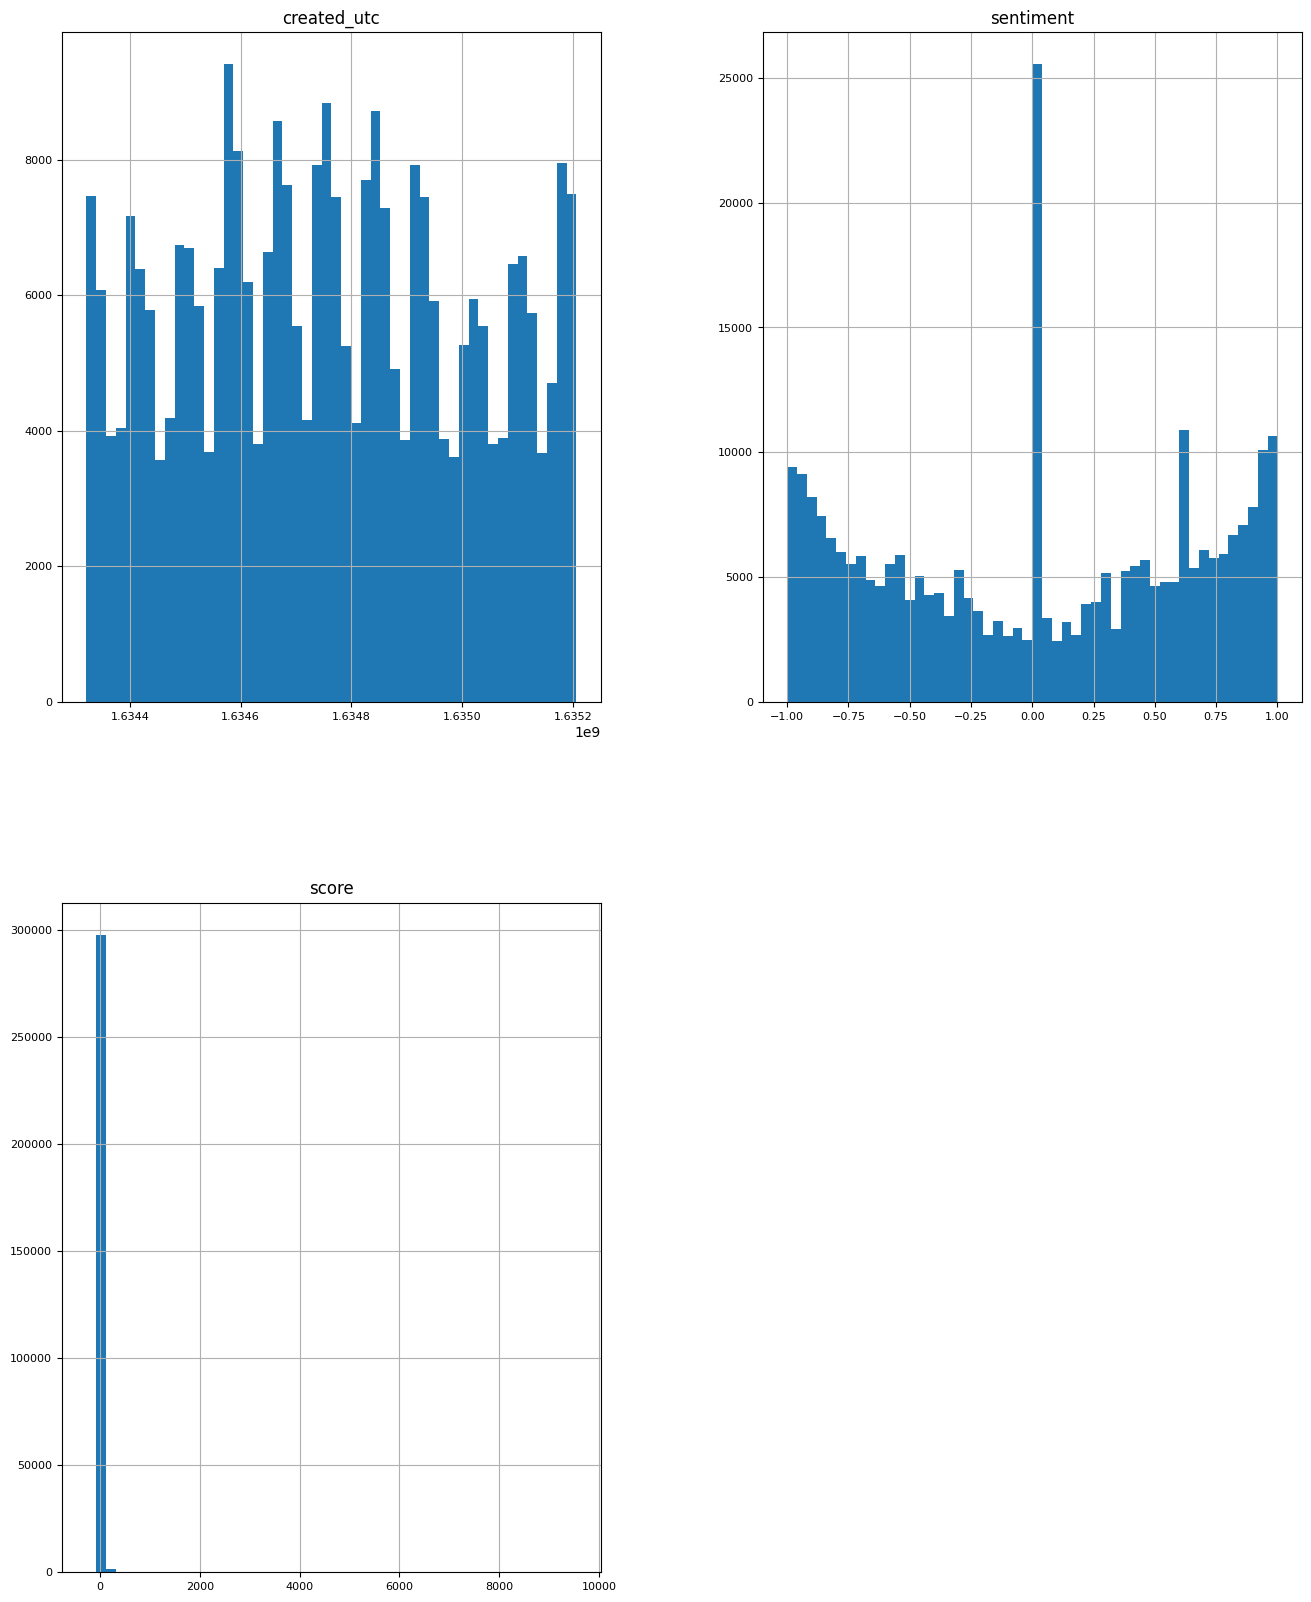

In [11]:
#Now, plot the distribution of the numerical variables
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

*What is the distribution of the categorical variables?*

In [12]:
#Here, only consider numerical variables
df_not_num = df.select_dtypes(include = ['O'])
#Print out the variables
df_not_num.head()

,type,id,subreddit.id,subreddit.name,permalink,body
0,comment,hi1vsag,2riyy,nova,https://old.reddit.com/r/nova/comments/qfs53d/...,When you scheduled your booster with CVS does ...
1,comment,hi1vs7i,2qhov,vancouver,https://old.reddit.com/r/vancouver/comments/qf...,Didn't stop prices there though. New Zealand a...
2,comment,hi1vs5n,2qwzb,pregnant,https://old.reddit.com/r/pregnant/comments/qfs...,I’m just waiting until after pregnancy to get ...
3,comment,hi1vs5v,2qixm,startrek,https://old.reddit.com/r/startrek/comments/qft...,*The first duty of every Starfleet officer is ...
4,comment,hi1vs0l,2qsf3,ontario,https://old.reddit.com/r/ontario/comments/qfkj...,Compare BC to Ontario for COVID. It's even mor...


In [13]:
#Select those variables you would like to see plotted
df_not_num = df_not_num[['Start Station Name', 'User Type']]
df_not_num.head()

KeyError: ignored

In [ ]:
#Now plot their distributions
fig, axes = plt.subplots(len(df_not_num.columns), 1, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()



*What is the correlation between the numerical variables?*

In [ ]:
#Plot a heat map of the correlation between variables
#Values towards 1 represent a strong positive correlation (i.e. they move in the same direction - if one variable is higher, the other is likely to be higher, if one variable is lower, the other is likely to be lower)
#Values towards -1 represent a strong negative correlation (i.e. the move in different directions - if one variable is higher, the other is likely to be lower)
#Values near 0 represent a weak correlation (i.e. there is no association between the variables)
corr = df_num.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

*What is the relationship between two numerical variables?*

Matplotlib is a python package that is commonly used for graphing.  Here is an example of will show how you can make a graph using matplotlib.

In [ ]:
#Two lists
x_values = [12, 15, 22] #speed
y_values = [8, 15, 12] #safety accidents

#Use the plot function in matplotlib to plot one line
#Can plot two lists
plt.plot(x_values, y_values, label='Safety Accidents')

# Add legend
plt.legend()

#Add axis labels
plt.xlabel('Speed')
plt.ylabel('Number of Accidents')

# Show the plot
plt.show()

*What is the relationship between time and a variable?*

This section shows how to create a time series plot. Here, we will use the seaborn package to construct graphs. Seaborn is good when you need to aggregate data to construct your graph, and also has some nice features for making your graphs visually appealing.

In [ ]:
#Convert data to datetime
df['Start Time'] = pd.to_datetime(df['Start Time'])
#Add variables to store the month, the year and the date without the time
df['Month'] = df['Start Time'].dt.month
df['Year'] = df['Start Time'].dt.year
df['Start Date'] = pd.to_datetime(df['Start Time'].dt.date)

In [ ]:
#Create a dummy variable to show that each row represents one bike ride
df['Number of Rides'] = 1

In [ ]:
#for each year, plot the total number of bike rides by month
rides_plot = sns.lineplot(data = df, x = 'Month', y = 'Number of Rides', hue = 'Year', palette = ['Red', 'Blue'], estimator = 'sum')
rides_plot.set_title("CitiBike Rides in Bed-Stuy")

In [ ]:
#for each year, plot the average trip duration of bike rides by month
time_plot = sns.lineplot(data = df, x = 'Month', y = 'Trip Duration', hue = 'Year', palette = ['Red', 'Blue'], estimator = 'mean', errorbar = None)
rides_plot.set_title("Average Trip Duration of CitiBike Rides in Bed-Stuy")

# Step 4: Final Reflections

*What did you learn about the social problem through your analysis of the data?*

YOUR ANSWER HERE

*After looking at this initial data, what do you think is important for you to understand?*

YOUR ANSWER HERE

*What questions will you seek to address through your initial literature review in Milestone 2?*

YOUR ANSWER HERE

*What questions will you seek to understand through your initial research into lived experiences for Milestone 2? Where might you find this information?*

YOUR ANSWER HERE